In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Drought_dataset_Chuadanga.csv")
df.head(10)

,Station,Year,Month,Temperature,Rainfall
0,Chuadanga,1994,1,18.80,9.00
1,Chuadanga,1994,2,24.80,15.44
2,Chuadanga,1994,3,28.90,35.33
3,Chuadanga,1994,4,32.90,47.11
4,Chuadanga,1994,5,34.70,119.11
5,Chuadanga,1994,6,31.00,225.78
6,Chuadanga,1994,7,30.25,366.89
7,Chuadanga,1994,8,30.80,209.56
8,Chuadanga,1994,9,30.25,321.44
9,Chuadanga,1994,10,29.30,186.67


In [ ]:
df.drop(df[(df['Month']==2) & (df['Year']%4!=0)].index,inplace=True)
df.drop(df[(df['Month']==2) & (df['Year']%4==0)].index,inplace=True)
df.drop(df[((df['Month']==4)|(df['Month']==6)|(df['Month']==9)|(df['Month']==11))].index,inplace=True)

In [ ]:
df.size

945

<Axes: xlabel='Year'>

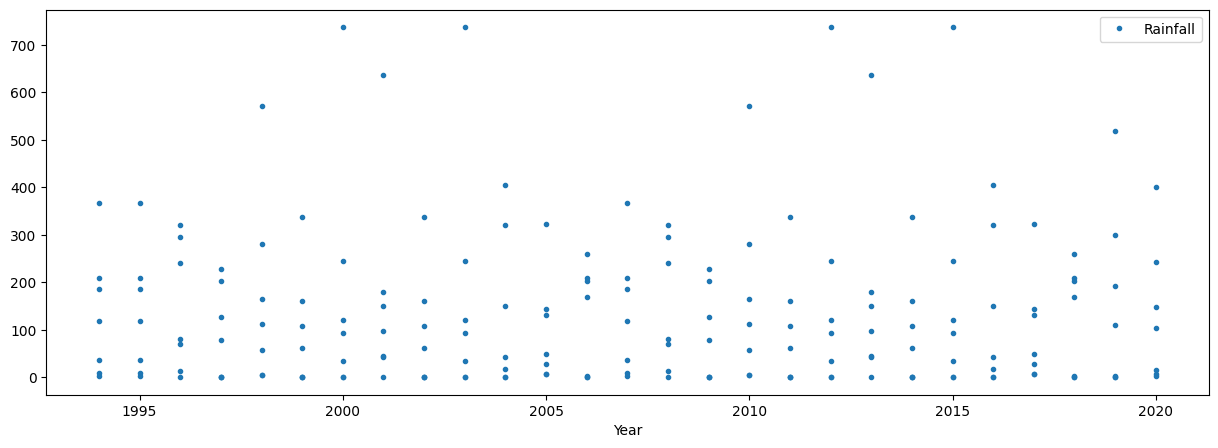

In [ ]:
df.plot(x='Year',y='Rainfall',style='.', figsize=(15,5))

<Axes: xlabel='Year'>

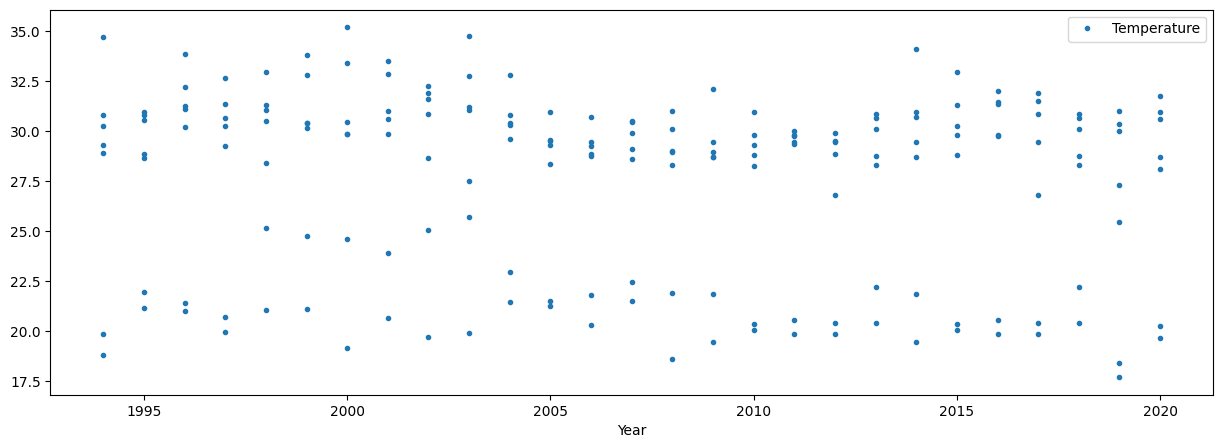

In [ ]:
df.plot(x='Year',y='Temperature',style='.', figsize=(15,5))

In [ ]:
train = df.loc[df['Year'] <= 2016]
test = df.loc[df['Year'] >= 2017]
train=train[train['Station']=='Chuadanga']
test=test[test['Station']=='Chuadanga']

In [ ]:
train.size

805

In [ ]:
X_train=train.drop(['Station', 'Month', 'Temperature', 'Rainfall'], axis=1)
Y_train=train['Rainfall']

In [ ]:
X_test=test.drop(['Station', 'Month', 'Temperature', 'Rainfall'],axis=1)
Y_test=test['Rainfall']

In [ ]:
from sklearn.svm import SVR
regressor=SVR(gamma='scale',kernel='linear')
regressor.fit(X_train,Y_train)
Y_pred = regressor.predict(X_test)

In [ ]:
df1_val = pd.DataFrame({'Actual Rainfall': Y_test, 'Predicted Rainfall': Y_pred})
df1_val[df1_val['Predicted Rainfall']>=0]

,Actual Rainfall,Predicted Rainfall
276,27.0,64.35
278,6.0,64.35
280,48.0,64.35
282,322.0,64.35
283,143.0,64.35
285,132.0,64.35
287,7.0,64.35
288,3.0,62.60
290,1.0,62.60
292,260.0,62.60


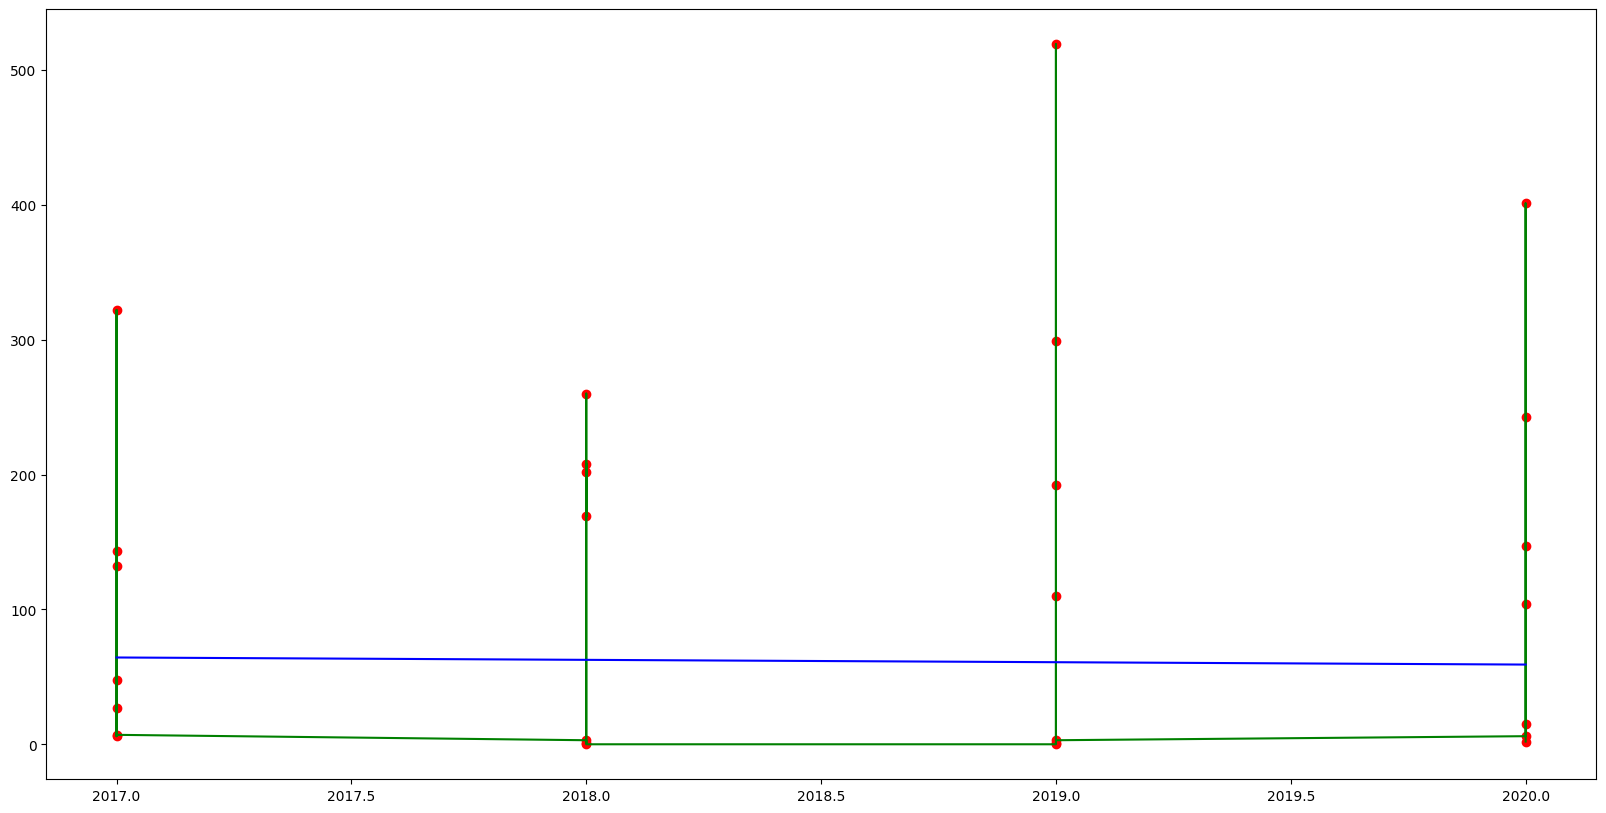

In [ ]:
plt.figure(figsize=(20,10))
plt.scatter(X_test['Year'],Y_test,color='red')
plt.plot(X_test['Year'],Y_test,color='green')
plt.plot(X_test['Year'],Y_pred,color='blue')

In [ ]:
import warnings
warnings.filterwarnings('ignore')

for i in range(2021,2024):
  Y_exp_pred = regressor.predict([[i]])
  df1 = pd.DataFrame({'Year': i, 'Predicted Rainfall': Y_exp_pred})
  df1[df1['Predicted Rainfall']>=0]
  print(df1)

   Year  Predicted Rainfall
0  2021               57.35
   Year  Predicted Rainfall
0  2022                55.6
   Year  Predicted Rainfall
0  2023               53.85


In [ ]:
for i in range(2024,2035):
  Y_exp_pred = regressor.predict([[i]])
  df1 = pd.DataFrame({'Year': i, 'Predicted Rainfall': Y_exp_pred})
  df1[df1['Predicted Rainfall']>=0]
  print(df1)

   Year  Predicted Rainfall
0  2024                52.1
   Year  Predicted Rainfall
0  2025               50.35
   Year  Predicted Rainfall
0  2026                48.6
   Year  Predicted Rainfall
0  2027               46.85
   Year  Predicted Rainfall
0  2028                45.1
   Year  Predicted Rainfall
0  2029               43.35
   Year  Predicted Rainfall
0  2030                41.6
   Year  Predicted Rainfall
0  2031               39.85
   Year  Predicted Rainfall
0  2032                38.1
   Year  Predicted Rainfall
0  2033               36.35
   Year  Predicted Rainfall
0  2034                34.6


In [ ]:
for i in range(2035, 2040):
  Y_exp_pred = regressor.predict([[i]])
  df1 = pd.DataFrame({'Year': i, 'Predicted Rainfall': Y_exp_pred})
  df1[df1['Predicted Rainfall']>=0]
  print(df1)

   Year  Predicted Rainfall
0  2035               32.85
   Year  Predicted Rainfall
0  2036                31.1
   Year  Predicted Rainfall
0  2037               29.35
   Year  Predicted Rainfall
0  2038                27.6
   Year  Predicted Rainfall
0  2039               25.85


Text(0.5, 1.0, 'Rainfall')

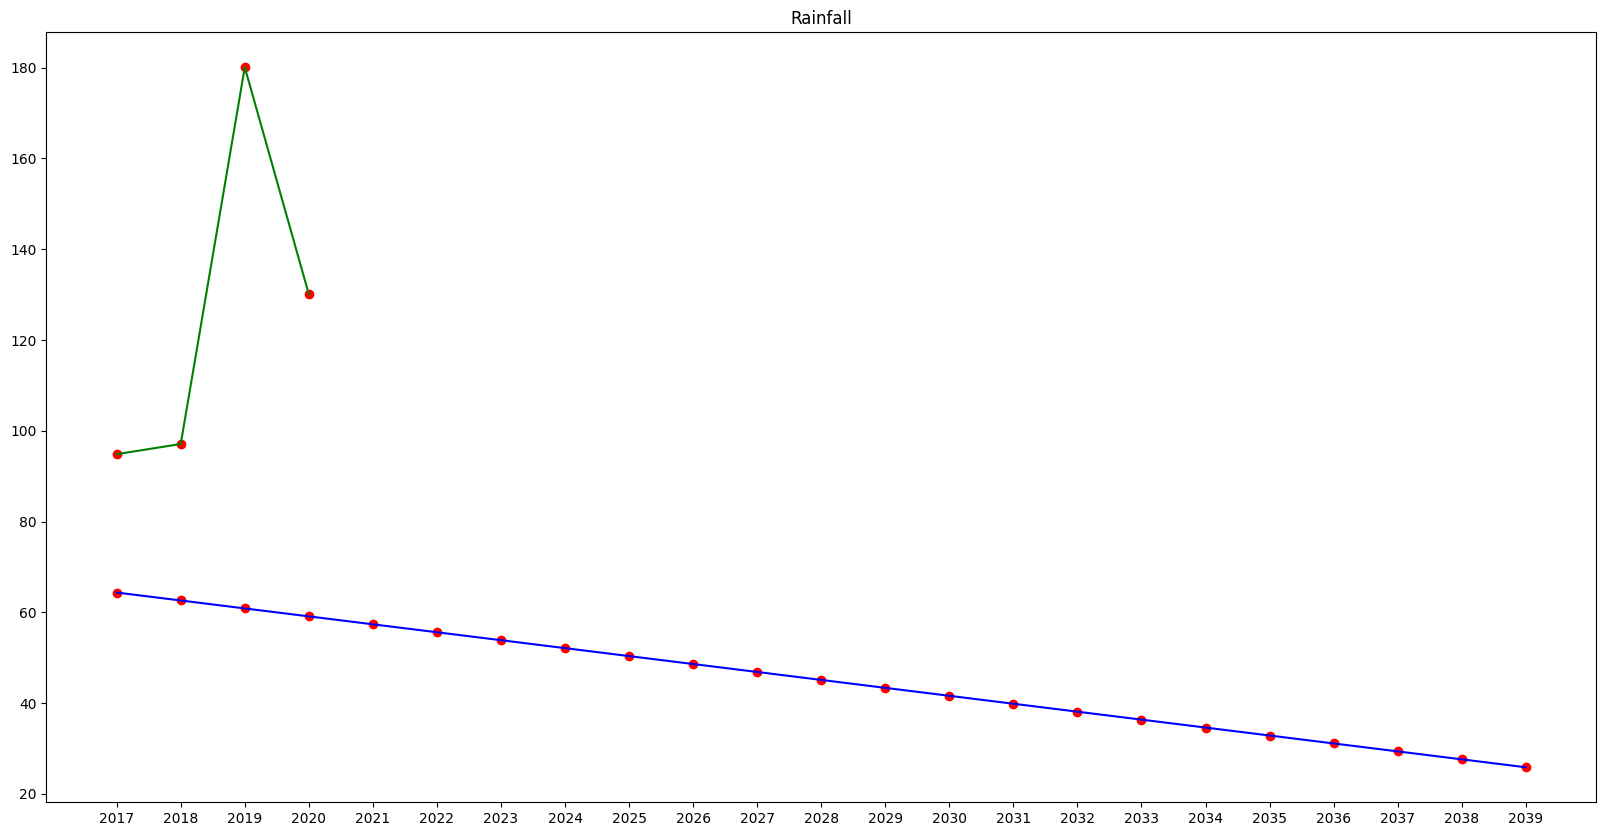

In [ ]:
rainfall = [64.35, 62.60, 60.85, 59.10, 57.35, 55.6, 53.85, 52.1, 50.35, 48.6, 46.85, 45.1, 43.35, 41.6, 39.85, 38.1, 36.35, 34.6, 32.85, 31.1, 29.35, 27.6, 25.85]
rainfall_actual = [94.833, 97.083, 180.083, 130.083]
year = ['2017', '2018', '2019', '2020', '2021', '2022', '2023', '2024','2025','2026','2027','2028', '2029', '2030', '2031', '2032', '2033', '2034', '2035', '2036', '2037', '2038', '2039']
year_val = ['2017', '2018', '2019', '2020']
plt.figure(figsize=(20,10))
plt.scatter(year, rainfall, color='red')
plt.plot(year, rainfall, color='blue')
plt.scatter(year_val, rainfall_actual, color='red')
plt.plot(year_val, rainfall_actual, color='green')
plt.title('Rainfall')

In [ ]:
Y_train2=train['Temperature']

In [ ]:
Y_test2=test['Temperature']

In [ ]:
from sklearn.svm import SVR
regressor=SVR(gamma='scale',kernel='linear')
regressor.fit(X_train,Y_train2)
Y_pred2 = regressor.predict(X_test)

In [ ]:
df2_val = pd.DataFrame({'Actual Temperature': Y_test2, 'Predicted Temperature': Y_pred2})
df2_val[df2_val['Predicted Temperature']>=0]

,Actual Temperature,Predicted Temperature
276,20.40,28.761111
278,26.80,28.761111
280,31.90,28.761111
282,30.85,28.761111
283,31.50,28.761111
285,29.45,28.761111
287,19.85,28.761111
288,20.40,28.691667
290,28.75,28.691667
292,30.85,28.691667


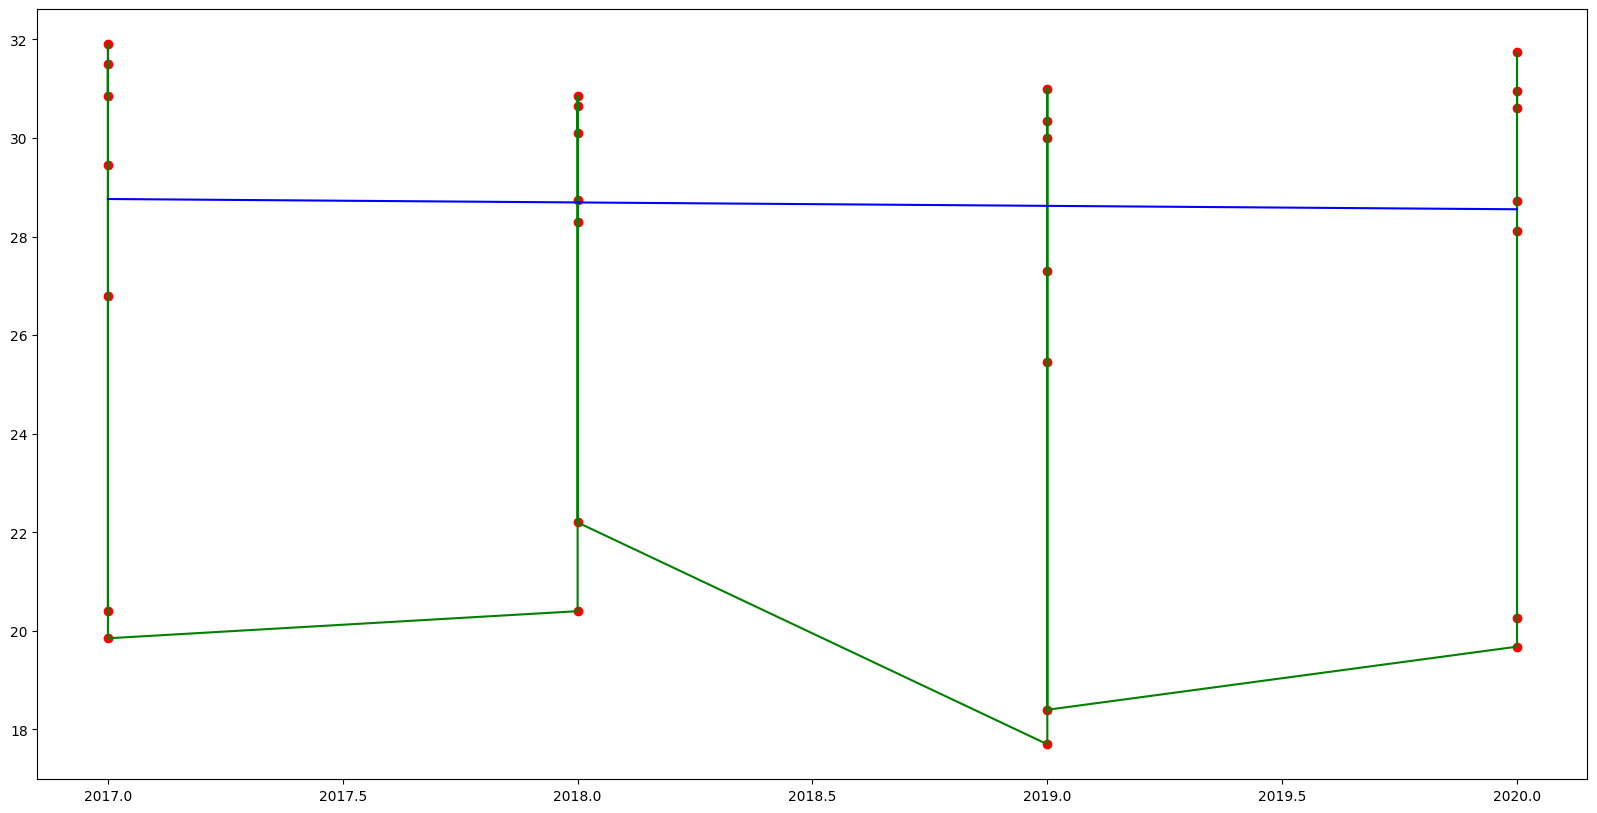

In [ ]:
plt.figure(figsize=(20,10))
plt.scatter(X_test['Year'],Y_test2,color='red')
plt.plot(X_test['Year'],Y_test2,color='green')
plt.plot(X_test['Year'],Y_pred2,color='blue')

In [ ]:
for i in range(2021,2024):
  Y_exp_pred2 = regressor.predict([[i]])
  df2 = pd.DataFrame({'Year': i, 'Predicted Temperature': Y_exp_pred2})
  df2[df2['Predicted Temperature']>=0]
  print(df2)

   Year  Predicted Temperature
0  2021              28.483333
   Year  Predicted Temperature
0  2022              28.413889
   Year  Predicted Temperature
0  2023              28.344444


In [ ]:
for i in range(2024,2031):
  Y_exp_pred2 = regressor.predict([[i]])
  df2 = pd.DataFrame({'Year': i, 'Predicted Temperature': Y_exp_pred2})
  df2[df2['Predicted Temperature']>=0]
  print(df2)

   Year  Predicted Temperature
0  2024                 28.275
   Year  Predicted Temperature
0  2025              28.205556
   Year  Predicted Temperature
0  2026              28.136111
   Year  Predicted Temperature
0  2027              28.066667
   Year  Predicted Temperature
0  2028              27.997222
   Year  Predicted Temperature
0  2029              27.927778
   Year  Predicted Temperature
0  2030              27.858333


In [ ]:
for i in range(2031,2040):
  Y_exp_pred2 = regressor.predict([[i]])
  df2 = pd.DataFrame({'Year': i, 'Predicted Temperature': Y_exp_pred2})
  df2[df2['Predicted Temperature']>=0]
  print(df2)

   Year  Predicted Temperature
0  2031              27.788889
   Year  Predicted Temperature
0  2032              27.719444
   Year  Predicted Temperature
0  2033                  27.65
   Year  Predicted Temperature
0  2034              27.580556
   Year  Predicted Temperature
0  2035              27.511111
   Year  Predicted Temperature
0  2036              27.441667
   Year  Predicted Temperature
0  2037              27.372222
   Year  Predicted Temperature
0  2038              27.302778
   Year  Predicted Temperature
0  2039              27.233333


Text(0.5, 1.0, 'Temperature')

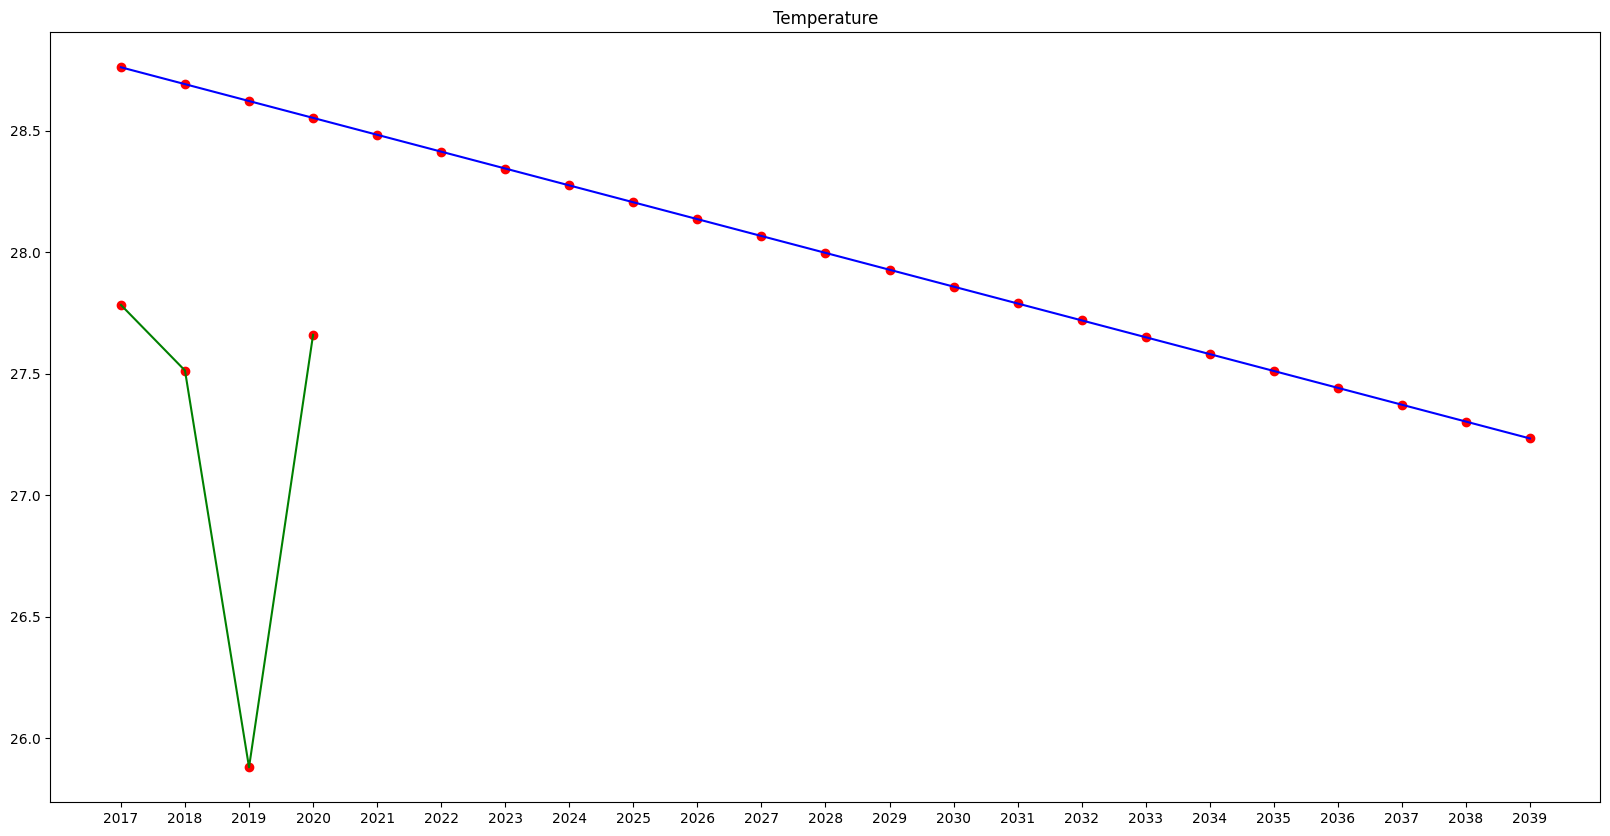

In [ ]:
temperature = [28.761111, 28.691667, 28.622222, 28.552778, 28.483333, 28.413889, 28.344444, 28.275, 28.205556, 28.136111, 28.066667, 27.997222, 27.927778, 27.858333, 27.788889, 27.719444, 27.65, 27.580556, 27.511111, 27.441667, 27.372222, 27.302778, 27.233333]
temperature_actual = [27.783, 27.513, 25.880, 27.660]
year = ['2017', '2018', '2019', '2020', '2021', '2022', '2023', '2024','2025','2026','2027','2028', '2029', '2030', '2031', '2032', '2033', '2034', '2035', '2036', '2037', '2038', '2039']
year_val = ['2017', '2018', '2019', '2020']
plt.figure(figsize=(20,10))
plt.scatter(year, temperature, color='red')
plt.plot(year, temperature, color='blue')
plt.scatter(year_val, temperature_actual, color='red')
plt.plot(year_val, temperature_actual, color='green')
plt.title('Temperature')

In [ ]:
avg_Y_test = (27.0+0.0+6.0+74.0+48.0+125.0+322.0+143.0+173.0+132.0+81.0+7.0+3.0+12.0++1.0+32.0+260.0+156.0+169.0+202.0+122.0+208.0+0.0+0.0+0.0+42.0+1.0+114.0+192.0+344.0+519.0+299.0+509.0+110.0+28.0+3.0+6.0+21.0+15.0+63.0+147.0+238.0+401.0+243.0+294.0+104.0+27.0+2.0)/48
avg_Y_test2 = (20.40+22.95+26.80+31.35+31.90+32.65+30.85+31.50+30.7+29.45+25.0+19.85+20.40+21.30+28.75+31.85+30.85+30.7+30.10+30.65+30.15+28.30+24.90+22.20+17.70+20.50+25.45+28.70+31.00+30.90+30.35+30.00+29.40+27.30+23.85+18.40+19.68+23.38+28.12+31.16+31.74+32.22+30.60+30.96+30.37+28.73+24.68+20.27)/48


In [ ]:
drought_2017 = (avg_Y_test / 64.35) * ((avg_Y_test2 / 28.761111)**0.5)
drought_2017_actual = (avg_Y_test / 94.833) * ((avg_Y_test2 / 27.783)**0.5)
drought_2018 = (avg_Y_test / 62.60) * ((avg_Y_test2 / 28.691667)**0.5)
drought_2018_actual = (avg_Y_test / 97.083) * ((avg_Y_test2 / 27.513)**0.5)
drought_2019 = (avg_Y_test / 60.85) * ((avg_Y_test2 / 28.622222)**0.5)
drought_2019_actual = (avg_Y_test / 180.083) * ((avg_Y_test2 / 25.880)**0.5)
drought_2020 = (avg_Y_test / 59.10) * ((avg_Y_test2 / 28.552778)**0.5)
drought_2020_actual = (avg_Y_test / 130.083) * ((avg_Y_test2 / 27.660)**0.5)
drought_2021 = (avg_Y_test / 57.35) * ((avg_Y_test2 / 28.483333)**0.5)
drought_2022 = (avg_Y_test / 55.6) * ((avg_Y_test2 / 28.413889)**0.5)
drought_2023 = (avg_Y_test / 53.85) * ((avg_Y_test2 / 28.344444)**0.5)
drought_2024 = (avg_Y_test / 52.1) * ((avg_Y_test2 / 28.275)**0.5)
drought_2025 = (avg_Y_test / 50.35) * ((avg_Y_test2 / 28.205556)**0.5)
drought_2026 = (avg_Y_test / 48.6) * ((avg_Y_test2 / 28.136111)**0.5)
drought_2027 = (avg_Y_test / 46.85) * ((avg_Y_test2 / 28.066667)**0.5)
drought_2028 = (avg_Y_test / 45.1) * ((avg_Y_test2 / 27.997222)**0.5)
drought_2029 = (avg_Y_test / 43.35) * ((avg_Y_test2 / 27.927778)**0.5)
drought_2030 = (avg_Y_test / 41.6) * ((avg_Y_test2 / 27.858333)**0.5)
drought_2031 = (avg_Y_test / 39.85) * ((avg_Y_test2 / 27.788889)**0.5)
drought_2032 = (avg_Y_test / 38.1) * ((avg_Y_test2 / 27.719444)**0.5)
drought_2033 = (avg_Y_test / 36.35) * ((avg_Y_test2 / 27.65)**0.5)
drought_2034 = (avg_Y_test / 34.6) * ((avg_Y_test2 / 27.580556)**0.5)
drought_2035 = (avg_Y_test / 32.85) * ((avg_Y_test2 / 27.511111)**0.5)
drought_2036 = (avg_Y_test / 31.1) * ((avg_Y_test2 / 27.441667)**0.5)
drought_2037 = (avg_Y_test / 29.35) * ((avg_Y_test2 / 27.372222)**0.5)
drought_2038 = (avg_Y_test / 27.6) * ((avg_Y_test2 / 27.302778)**0.5)
drought_2039 = (avg_Y_test / 25.85) * ((avg_Y_test2 / 27.233333)**0.5)
print("Drought possibility in 2017:", drought_2017)
print("Drought possibility in 2017_actual:", drought_2017_actual)
print("Drought possibility in 2018:", drought_2018)
print("Drought possibility in 2018_actual:", drought_2018_actual)
print("Drought possibility in 2019:", drought_2019)
print("Drought possibility in 2019_actual:", drought_2019_actual)
print("Drought possibility in 2020:", drought_2020)
print("Drought possibility in 2020_actual:", drought_2020_actual)
print("Drought possibility in 2021:", drought_2021)
print("Drought possibility in 2022:", drought_2022)
print("Drought possibility in 2023:", drought_2023)
print("Drought possibility in 2024:", drought_2024)
print("Drought possibility in 2025:", drought_2025)
print("Drought possibility in 2026:", drought_2026)
print("Drought possibility in 2027:", drought_2027)
print("Drought possibility in 2028:", drought_2028)
print("Drought possibility in 2029:", drought_2029)
print("Drought possibility in 2030:", drought_2030)
print("Drought possibility in 2031:", drought_2031)
print("Drought possibility in 2032:", drought_2032)
print("Drought possibility in 2033:", drought_2033)
print("Drought possibility in 2034:", drought_2034)
print("Drought possibility in 2035:", drought_2035)
print("Drought possibility in 2036:", drought_2036)
print("Drought possibility in 2037:", drought_2037)
print("Drought possibility in 2038:", drought_2038)
print("Drought possibility in 2039:", drought_2039)

Drought possibility in 2017: 1.899395028714494
Drought possibility in 2017_actual: 1.3113469738498027
Drought possibility in 2018: 1.9548545671270596
Drought possibility in 2018_actual: 1.2872251458251416
Drought possibility in 2019: 2.013512925380907
Drought possibility in 2019_actual: 0.7155036019033947
Drought possibility in 2020: 2.075654245582415
Drought possibility in 2020_actual: 0.958120307709897
Drought possibility in 2021: 2.1415975012946387
Drought possibility in 2022: 2.2117016705846817
Drought possibility in 2023: 2.2863725560150923
Drought possibility in 2024: 2.3660703169807804
Drought possibility in 2025: 2.451319217038281
Drought possibility in 2026: 2.542719032222641
Drought possibility in 2027: 2.640959013105493
Drought possibility in 2028: 2.746835584723313
Drought possibility in 2029: 2.861273573238263
Drought possibility in 2030: 2.985353638072683
Drought possibility in 2031: 3.1203460437764496
Drought possibility in 2032: 3.2677546716789245
Drought possibility in

Text(0.5, 1.0, 'Drought index')

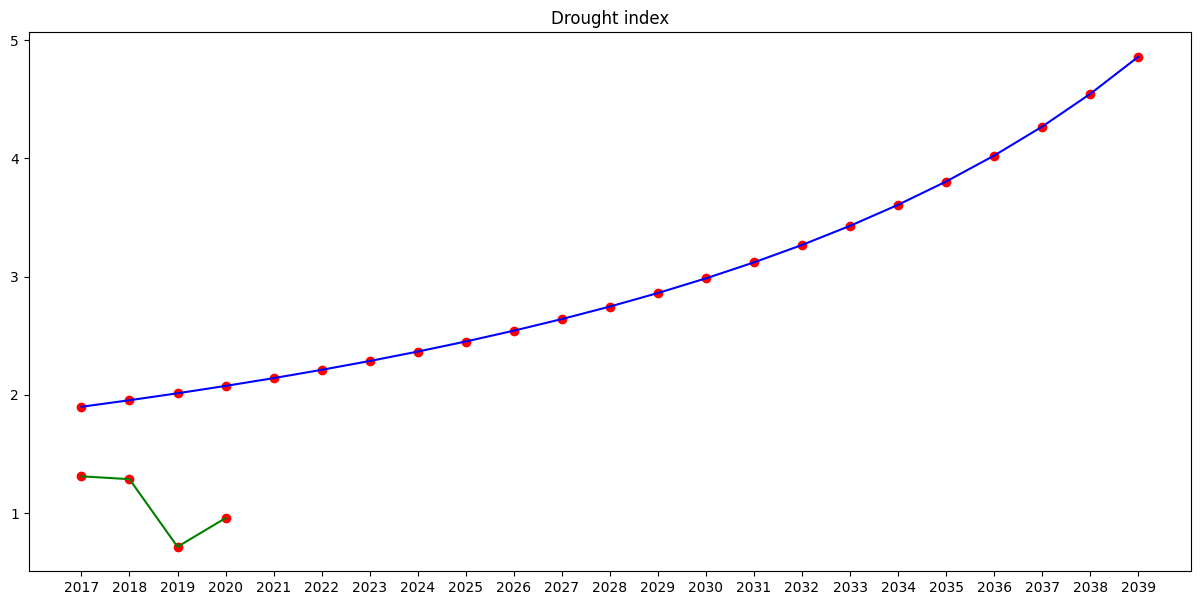

In [ ]:
drought = [1.899395028714494, 1.9548545671270596, 2.013512925380907, 2.075654245582415, 2.1415975012946387, 2.2117016705846817, 2.2863725560150923, 2.3660703169807804, 2.451319217038281, 2.542719032222641, 2.640959013105493, 2.746835584723313, 2.861273573238263, 2.985353638072683, 3.1203460437764496, 3.2677546716789245, 3.4293727635416356, 3.607356550862074, 3.8043217381058754, 4.023472555748573, 4.26877775664848, 4.545212332209875, 4.859098822326056]
drought_actual = [1.3113469738498027, 1.2872251458251416, 0.7155036019033947, 0.958120307709897]
year = ['2017', '2018', '2019', '2020', '2021', '2022', '2023', '2024','2025','2026','2027','2028', '2029', '2030', '2031', '2032', '2033', '2034', '2035', '2036', '2037', '2038', '2039']
year_val = ['2017', '2018', '2019', '2020']
plt.figure(figsize=(15,7))
plt.scatter(year, drought, color='red')
plt.plot(year, drought, color='blue')
plt.scatter(year_val, drought_actual, color='red')
plt.plot(year_val, drought_actual, color='green')
plt.title('Drought index')